# Naive Bayes Classifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 21.4 s (started: 2023-11-26 21:49:51 +00:00)


In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00
time: 342 µs (started: 2023-11-26 21:47:53 +00:00)


In [5]:
df_train=pd.read_csv('/content/drive/MyDrive/CSE_4554_MachineLearning/training_set.csv')
df_val=pd.read_csv('/content/drive/MyDrive/CSE_4554_MachineLearning/validation_set.csv')

time: 11.7 s (started: 2023-11-26 21:53:23 +00:00)


In [13]:
X_train = df_train.drop(['Bug Present','filename','Unnamed: 0'], axis=1)
y_train = df_train['Bug Present']
X_val = df_val.drop(['Bug Present','filename'], axis=1)
y_val = df_val['Bug Present']

time: 166 ms (started: 2023-11-26 21:55:14 +00:00)


In [14]:
model = make_pipeline(StandardScaler(), GaussianNB())

time: 503 µs (started: 2023-11-26 21:55:15 +00:00)


In [15]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

time: 486 µs (started: 2023-11-26 21:55:16 +00:00)


In [16]:
model.fit(X_train, y_train)
cross_val_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

time: 13.8 s (started: 2023-11-26 21:55:18 +00:00)


In [17]:
val_accuracy = model.score(X_val, y_val)

time: 899 ms (started: 2023-11-26 21:55:31 +00:00)


In [18]:
print("Cross-validation results:", cross_val_results)
print("Mean Cross-validation accuracy: {:.2f}%".format(cross_val_results.mean() * 100))
print("Validation accuracy: {:.2f}%".format(val_accuracy * 100))

Cross-validation results: [0.94168026 0.94145811 0.94133554 0.94173389 0.94197136 0.94216288
 0.94204031 0.94292084 0.94082949 0.94144234]
Mean Cross-validation accuracy: 94.18%
Validation accuracy: 94.26%
time: 3.51 ms (started: 2023-11-26 21:55:32 +00:00)


# Performance Metrics

In [19]:
df_test=pd.read_csv('/content/drive/MyDrive/CSE_4554_MachineLearning/testing_set.csv')

time: 387 ms (started: 2023-11-26 22:06:07 +00:00)


In [22]:
X_test= df_test.drop(['Bug Present','filename'], axis=1)
y_test = df_test['Bug Present']

time: 1.97 ms (started: 2023-11-26 22:07:17 +00:00)


In [23]:
y_pred=model.predict(X_test)

time: 7.08 ms (started: 2023-11-26 22:09:04 +00:00)


In [24]:
from sklearn.metrics import accuracy_score

time: 357 µs (started: 2023-11-26 22:09:09 +00:00)


In [29]:
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy: ",accuracy*100,"%")

Accuracy:  42.857142857142854 %
time: 4.76 ms (started: 2023-11-26 22:10:22 +00:00)


In [30]:
from sklearn.metrics import roc_curve,auc

time: 504 µs (started: 2023-11-26 22:14:46 +00:00)


In [31]:
fpr,tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)

time: 3.23 ms (started: 2023-11-26 22:16:25 +00:00)


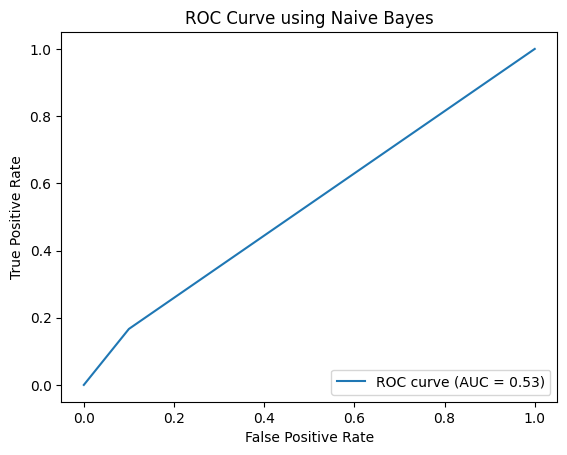

time: 351 ms (started: 2023-11-26 22:18:45 +00:00)


In [35]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

time: 572 µs (started: 2023-11-26 22:21:29 +00:00)


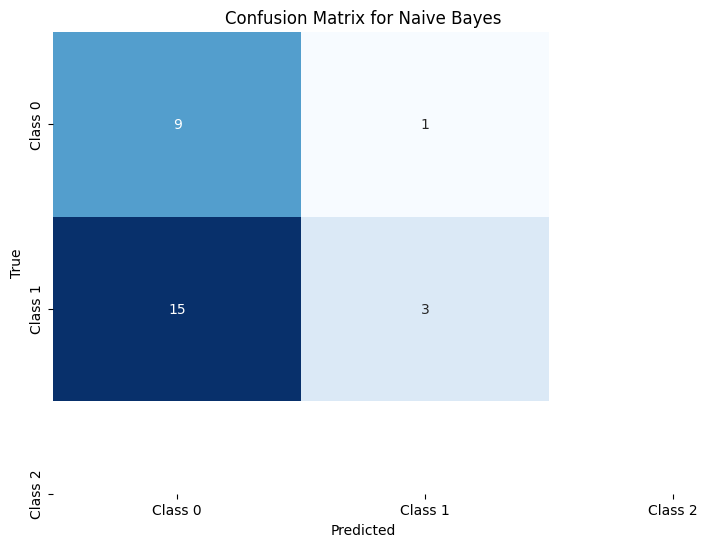

time: 121 ms (started: 2023-11-26 22:20:06 +00:00)


In [37]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')

plt.show()